In [1]:
import os
import tomopy
import numpy as np
import matplotlib.pyplot as plt
import sys
import utilities as rocku
import h5py as h5f
from tqdm import tqdm
import timeit
import multiprocessing as mp

from tifffile import TiffFile
from pprint import pprint
import pandas as pd
# from findpeaks import findpeaks
import plotly.express as px

# %matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 256


In [2]:
# need to change
ipts="23768"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [3]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['06_29_21_OB',
 '06_29_21_dark_field',
 '2021_02_25',
 '2021_03_25',
 '2021_04_12',
 '2021_04_14',
 '2021_04_15',
 '2021_04_18_resolution',
 '2021_04_22_25um_scint',
 '2021_04_22_BN_PLA',
 '2021_04_27_light',
 '2021_05_25',
 '2021_07_07_Cu_fastCT',
 '2021_07_07_Cu_fastCT01',
 '2021_07_26',
 '2021_07_26_super_res',
 '2021_09_04_mono_test',
 '2022_01_04_flux',
 '2022_01_04_stability',
 '2022_01_09_stability',
 '2022_01_13_neutron_eater',
 '2022_01_23_recover_from_slits',
 '2022_09_29_startup',
 '2022_11_08_intensity_check',
 '2023_05_23_QHYS',
 '2023_05_23_QHYS_Choppers',
 '2023_05_23_QHYS_gain_tuning',
 '2023_05_24_VENUS_chopper',
 '2023_08_29_beamsize',
 '2023_08_29_cycle503',
 '2024_01_22_QHY_resolution',
 '2024_03_15_QHYL_1X_test_resolution',
 '2024_03_15_idealVac_plate',
 '2024_04_09_cycle_506',
 '2024_04_09_cycle_506_',
 '2024_04_09_cycle_506_8mm',
 '2024_06_10_comm_test',
 '2024_06_11_comm_test',
 '2024_06_20_BM_calibration',
 '2024_06_20_QHY_resolution',
 '2024_06_24_QHYL_resolu

In [4]:
# sample_name = "2024_11_07_optics_scan_pinhole_vert55mm_woDiffuser_30s"
# sample_name = "2024_11_07_optics_scan_pinhole_vert55mm_wDiffuser_30s"
sample_name = "2024_07_23_optics_scan_withDiffuser_60mmVertTrans_pinhole_10s"
# sample_name = "2024_08_07_flux"
# sample_name = "2024_07_02_pinhole_11mm_BN_hori_scan_60s"
# sample_name = "2024_07_02_moving_pinhole_11mm_BN_hori_scan_60s"
# sample_name = "2024_07_02_moving_pinhole_11mm_BN_verti_scan_60s"
scan_dir = os.path.join(scan_loc, sample_name)

In [5]:
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_list

['scan00_0.000_0010_2049.tiff',
 'scan00_0.500_0010_2048.tiff',
 'scan00_1.000_0010_2047.tiff',
 'scan00_1.500_0010_2046.tiff',
 'scan00_10.000_0010_2029.tiff',
 'scan00_10.500_0010_2028.tiff',
 'scan00_100.000_0010_1849.tiff',
 'scan00_100.500_0010_1848.tiff',
 'scan00_101.000_0010_1847.tiff',
 'scan00_101.500_0010_1846.tiff',
 'scan00_102.000_0010_1845.tiff',
 'scan00_102.500_0010_1844.tiff',
 'scan00_103.000_0010_1843.tiff',
 'scan00_103.500_0010_1842.tiff',
 'scan00_104.000_0010_1841.tiff',
 'scan00_104.500_0010_1840.tiff',
 'scan00_105.000_0010_1839.tiff',
 'scan00_105.500_0010_1838.tiff',
 'scan00_106.000_0010_1837.tiff',
 'scan00_106.500_0010_1836.tiff',
 'scan00_107.000_0010_1835.tiff',
 'scan00_107.500_0010_1834.tiff',
 'scan00_108.000_0010_1833.tiff',
 'scan00_108.500_0010_1832.tiff',
 'scan00_109.000_0010_1831.tiff',
 'scan00_109.500_0010_1830.tiff',
 'scan00_11.000_0010_2027.tiff',
 'scan00_11.500_0010_2026.tiff',
 'scan00_110.000_0010_1829.tiff',
 'scan00_110.500_0010_1828

In [6]:
to_rmv = [

]
fname_list = rocku.remove_fnames(fname_list, to_rmv)
# fname_list = rocku.filter_list(fname_list, "_0120_")
fname_list

601
601


['scan00_0.000_0010_2049.tiff',
 'scan00_0.500_0010_2048.tiff',
 'scan00_1.000_0010_2047.tiff',
 'scan00_1.500_0010_2046.tiff',
 'scan00_10.000_0010_2029.tiff',
 'scan00_10.500_0010_2028.tiff',
 'scan00_100.000_0010_1849.tiff',
 'scan00_100.500_0010_1848.tiff',
 'scan00_101.000_0010_1847.tiff',
 'scan00_101.500_0010_1846.tiff',
 'scan00_102.000_0010_1845.tiff',
 'scan00_102.500_0010_1844.tiff',
 'scan00_103.000_0010_1843.tiff',
 'scan00_103.500_0010_1842.tiff',
 'scan00_104.000_0010_1841.tiff',
 'scan00_104.500_0010_1840.tiff',
 'scan00_105.000_0010_1839.tiff',
 'scan00_105.500_0010_1838.tiff',
 'scan00_106.000_0010_1837.tiff',
 'scan00_106.500_0010_1836.tiff',
 'scan00_107.000_0010_1835.tiff',
 'scan00_107.500_0010_1834.tiff',
 'scan00_108.000_0010_1833.tiff',
 'scan00_108.500_0010_1832.tiff',
 'scan00_109.000_0010_1831.tiff',
 'scan00_109.500_0010_1830.tiff',
 'scan00_11.000_0010_2027.tiff',
 'scan00_11.500_0010_2026.tiff',
 'scan00_110.000_0010_1829.tiff',
 'scan00_110.500_0010_1828

In [7]:
lookup_tags = ['BMCounterRate', 'BMCounter', 'MotAperture', 'MotHoriTrans', 'MotVertTrans', 'ExposureTime']
meta_dict = {}
for e_tif in fname_list:
    meta_dict[e_tif] = {}
    with TiffFile(os.path.join(scan_dir, e_tif)) as tif:
        for page in tif.pages:
            for tag in page.tags:
                tag_name, tag_value = tag.name, tag.value
                if type(tag_value) == str and ':' in tag_value:
                    tag_name = tag_value.split(':')[0]
                    tag_value = tag_value.split(':')[1]
                if tag_name in lookup_tags:
                    meta_dict[e_tif][tag_name] = float(tag_value)
#                 print("NAME:", tag_name)
#                 print("VALUE:", tag_value)
meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
meta_df['Rate'] = meta_df['BMCounter']/meta_df['ExposureTime']
meta_df['Neutrons_woWaveCorr'] = meta_df['Rate']/(rocku.BM_eff*(2.5/rocku.BM_eff_wave))

In [8]:
path_to_beam_shape = '/SNS/users/y9z/Documents/GitHub/research_stuff/jupyter_notebooks/norm_recon/beam_flux_cg1d.txt'
df = pd.read_csv(path_to_beam_shape, sep='\t', skiprows=0)
df.columns = ['wavelength_A', 'flux']
total_flux = df['flux'].sum()
# df['percent']= df['flux']/total_flux
df['BM_eff'] = rocku.BM_eff*(df['wavelength_A']/rocku.BM_eff_wave)
df['count'] = df['flux']*df['BM_eff']
total_count = df['count'].sum()
df['count_percent'] = df['count']/total_count
df

,wavelength_A,flux,BM_eff,count,count_percent
0,0.812655,1.776169e+04,0.000003,0.060864,0.000135
1,1.028404,1.201199e+05,0.000004,0.520892,0.001158
2,1.244153,2.919421e+05,0.000005,1.531580,0.003404
3,1.459902,5.860009e+05,0.000006,3.607375,0.008018
4,1.675651,1.030660e+06,0.000007,7.282297,0.016186
...,...,...,...,...,...
70,15.915091,8.130430e+02,0.000067,0.054562,0.000121
71,16.130840,1.207986e+02,0.000068,0.008217,0.000018
72,16.346589,2.553641e+02,0.000069,0.017602,0.000039
73,16.562339,3.654197e+02,0.000070,0.025520,0.000057


In [9]:
# measured_count = 2688 # per s, L/D 500 10s
measured_count = meta_df['Rate'].max()
df['neutrons'] = df['count_percent']*measured_count/df['BM_eff']
df

,wavelength_A,flux,BM_eff,count,count_percent,neutrons
0,0.812655,1.776169e+04,0.000003,0.060864,0.000135,7.675424e+05
1,1.028404,1.201199e+05,0.000004,0.520892,0.001158,5.190784e+06
2,1.244153,2.919421e+05,0.000005,1.531580,0.003404,1.261580e+07
3,1.459902,5.860009e+05,0.000006,3.607375,0.008018,2.532307e+07
4,1.675651,1.030660e+06,0.000007,7.282297,0.016186,4.453829e+07
...,...,...,...,...,...,...
70,15.915091,8.130430e+02,0.000067,0.054562,0.000121,3.513432e+04
71,16.130840,1.207986e+02,0.000068,0.008217,0.000018,5.220113e+03
72,16.346589,2.553641e+02,0.000069,0.017602,0.000039,1.103514e+04
73,16.562339,3.654197e+02,0.000070,0.025520,0.000057,1.579101e+04


In [10]:
# With correction based on wavelength dependent BM efficiency
df['neutrons'].sum()

1304767801.5189266

In [11]:
# No scaling of the BM efficiency
meta_df['Neutrons_woWaveCorr'].max()

1844366798.4189725

In [12]:
#############################
neutrons_list = []
for i, each in enumerate(meta_df['Rate']):
    df['neutrons'] = df['count_percent']*each/df['BM_eff']
    _sum = df['neutrons'].sum()
    neutrons_list.append(_sum)
meta_df['Neutrons'] = neutrons_list
# meta_df['Neutron_flux'] = meta_df['Neutrons']/area_cm2
meta_df
# sum(df['count_percent']*meta_df['Rate']/df['BM_eff'])

,ExposureTime,MotHoriTrans,MotVertTrans,MotAperture,BMCounter,BMCounterRate,Rate,Neutrons_woWaveCorr,Neutrons
scan00_0.000_0010_2049.tiff,10.0,28.0,60.0,0.0,4409.0,395.0,440.9,4.182451e+07,2.958808e+07
scan00_0.500_0010_2048.tiff,10.0,28.0,60.0,0.5,4868.0,414.0,486.8,4.617866e+07,3.266835e+07
scan00_1.000_0010_2047.tiff,10.0,28.0,60.0,1.0,4756.0,414.0,475.6,4.511621e+07,3.191674e+07
scan00_1.500_0010_2046.tiff,10.0,28.0,60.0,1.5,4438.0,399.0,443.8,4.209960e+07,2.978269e+07
scan00_10.000_0010_2029.tiff,10.0,28.0,60.0,10.0,4751.0,422.0,475.1,4.506877e+07,3.188318e+07
...,...,...,...,...,...,...,...,...,...
scan00_97.500_0010_1854.tiff,10.0,28.0,60.0,97.5,2793.0,224.0,279.3,2.649486e+07,1.874337e+07
scan00_98.000_0010_1853.tiff,10.0,28.0,60.0,98.0,2906.0,248.0,290.6,2.756680e+07,1.950169e+07
scan00_98.500_0010_1852.tiff,10.0,28.0,60.0,98.5,3156.0,239.0,315.6,2.993834e+07,2.117940e+07
scan00_99.000_0010_1851.tiff,10.0,28.0,60.0,99.0,3075.0,265.0,307.5,2.916996e+07,2.063582e+07


Neutrons_woWaveCorr max: 1844366798.4189725
Neutrons_woWaveCorr flux max (n/s/cm2): 917312790.1342274
BMCounterRate max: 15794.0
BMCounterRate flux max (n/s/cm2): 648938266.2465067


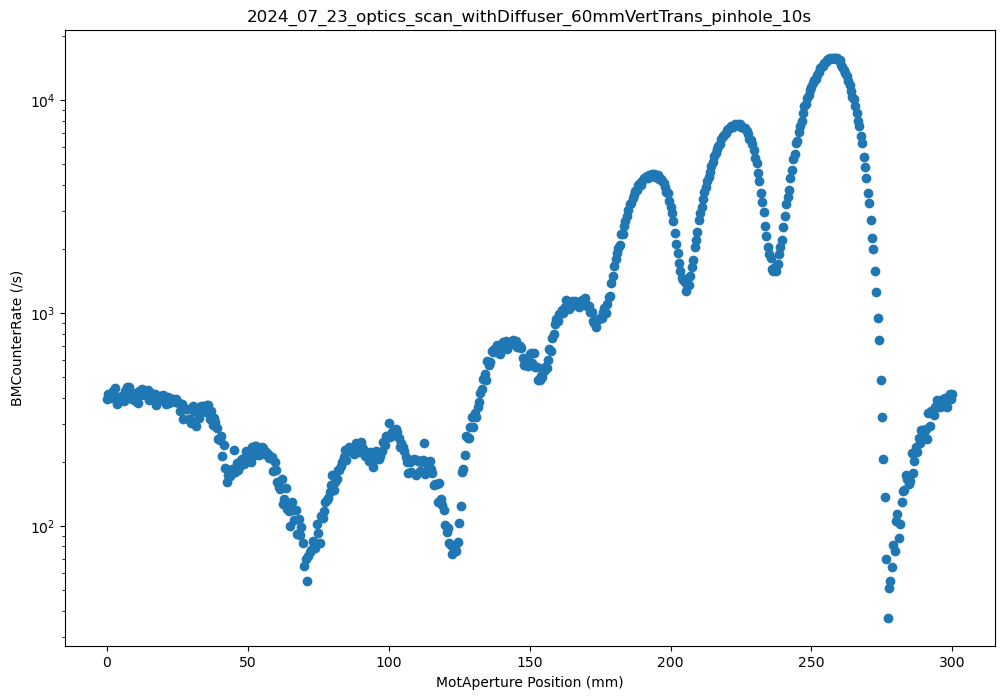

In [13]:
# peaks = find_peaks(meta_df['Rate'], prominence=10000)
pinhole_dia_cm = 1.6
area_cm2 = np.pi*(pinhole_dia_cm/2)**2
# area_cm2 = 0.2*0.2
# print(area_cm2)
####################################
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
x_label = 'MotAperture'
# x_label = 'ExposureTime'
y_label = 'BMCounterRate'
# y_label = 'Neutrons'
ax.scatter(meta_df[x_label], meta_df[y_label])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
# ax.plot(meta_df[x_label].iloc[peaks[0]], meta_df[y_label].iloc[peaks[0]], "x", color='y')

ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("{} Position (mm)".format(x_label))
plt.ylabel("{} (/s)".format(y_label))
plt.title(sample_name)
print('Neutrons_woWaveCorr', "max:", meta_df['Neutrons_woWaveCorr'].max())
print('Neutrons_woWaveCorr', "flux max (n/s/cm2):", meta_df['Neutrons_woWaveCorr'].max()/area_cm2)
print(y_label, "max:", meta_df[y_label].max())
print(y_label, "flux max (n/s/cm2):", meta_df['Neutrons'].max()/area_cm2)

In [ ]:
# fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
x_label = 'MotAperture'
# x_label = 'ExposureTime'
y_label = 'Rate'
# y_label = 'Neutrons'
# y_label = 'Neutrons_woWaveCorr'
fig = px.scatter(x=meta_df[x_label], y=meta_df[y_label],log_y=False, title=sample_name)
fig.update_layout(xaxis_title="{} Position (mm)".format(x_label), yaxis_title="{} (/s)".format(y_label))
fig.show()

Text(0.5, 1.0, '2024_07_23_optics_scan_woDiffuser_16mmPinhole_VertTrans_5s')

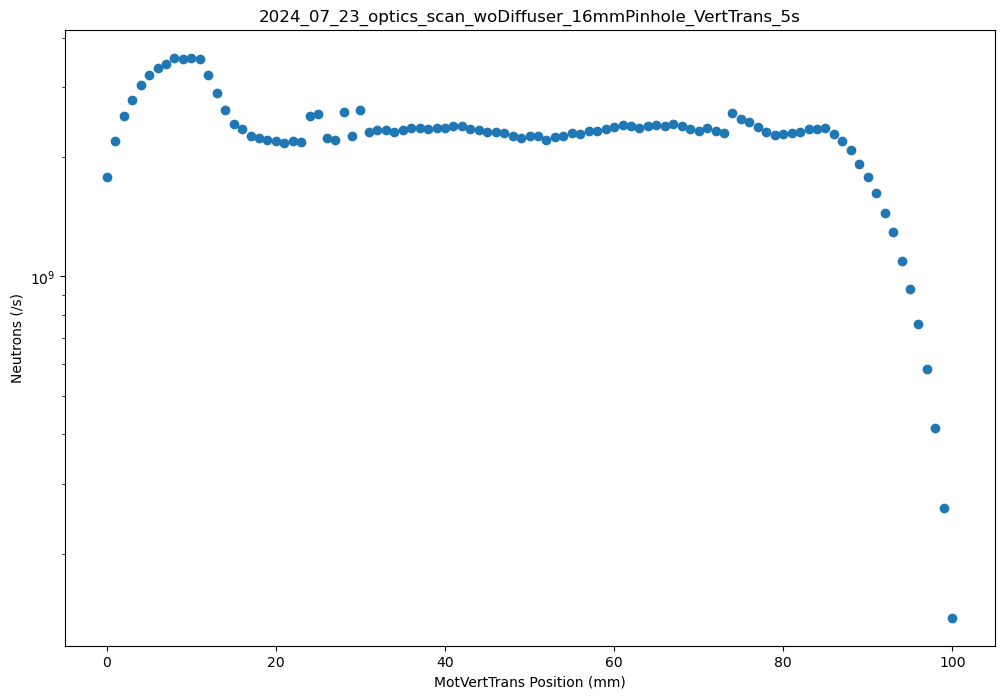

In [11]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
x_label = 'MotVertTrans'
y_label = 'Neutrons'
ax.scatter(meta_df[x_label], meta_df[y_label])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("{} Position (mm)".format(x_label))
plt.ylabel("{} (/s)".format(y_label))
plt.title(sample_name)

In [13]:
meta_df.Neutrons.max()

3558924901.185771

In [47]:
meta_df.Neutrons.max()

2242368379.4466405

In [21]:
meta_df.Neutrons.max()

1723794466.4031622

In [62]:
meta_df.Neutrons.max()

1844366798.4189725

In [34]:
meta_df.Neutrons.max()

2277419762.84585

In [13]:
meta_df['MotAperture'][meta_df['Rate']==meta_df.Rate.min()]

scan00_277.000_0010_0894.tiff    277.0
Name: MotAperture, dtype: float64

In [39]:
meta_df['MotAperture'][meta_df['Rate']==24007.8]

scan00_257.500_0010_0933.tiff    257.5
Name: MotAperture, dtype: float64

Text(0.5, 1.0, 'Pinhole aperture scan (fixed BN mask)')

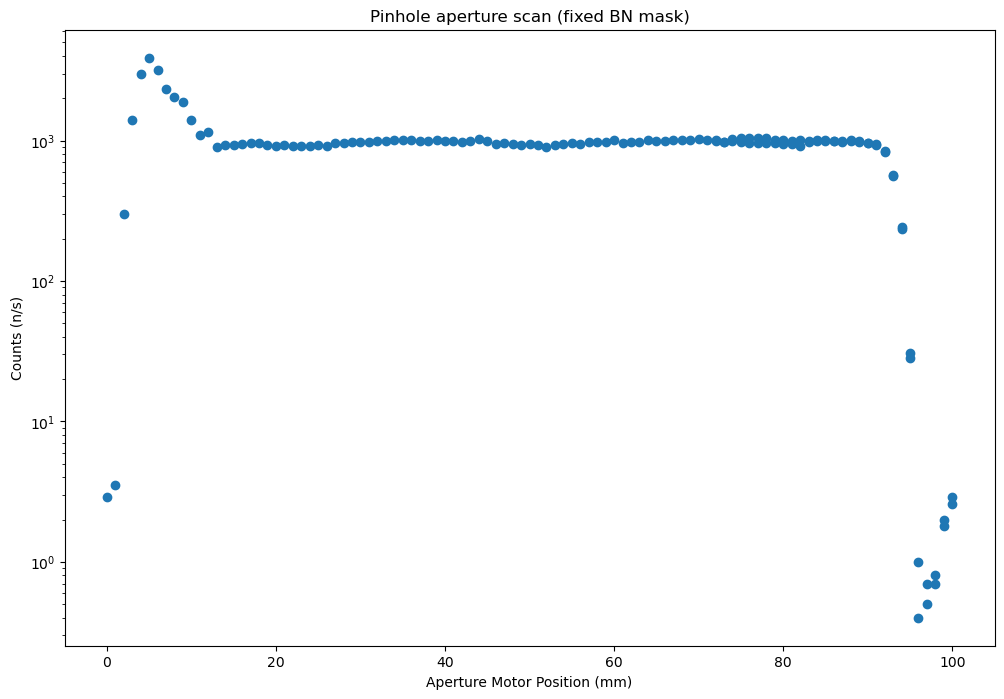

In [22]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotVertTrans'], meta_df['Rate'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("Aperture Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole aperture scan (fixed BN mask)")

Text(0.5, 1.0, 'Pinhole with BN mask scan')

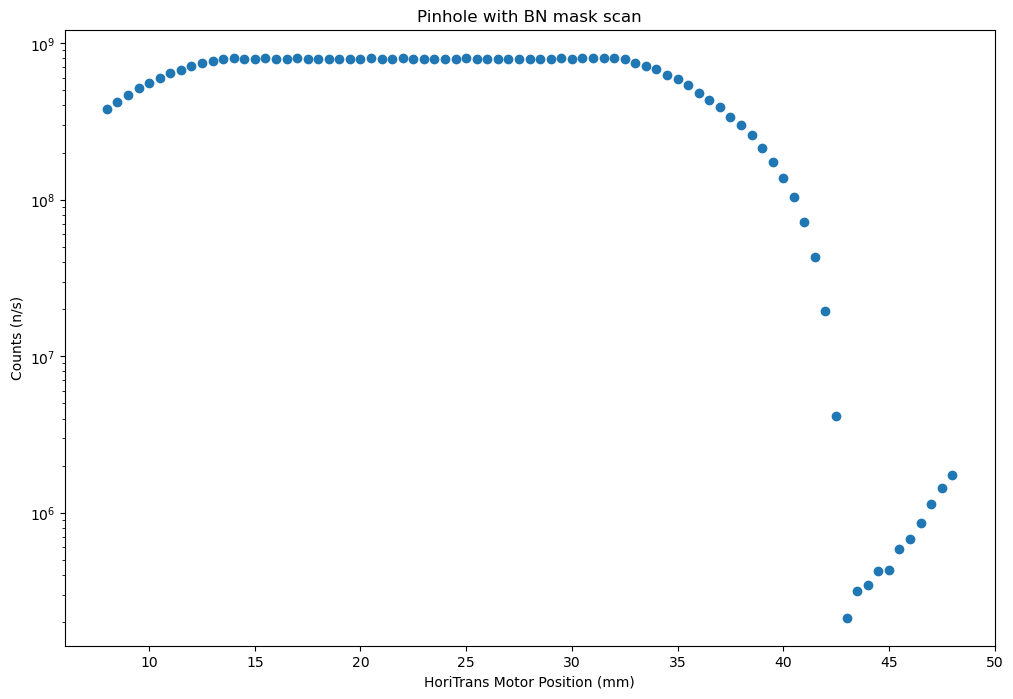

In [32]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotHoriTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("HoriTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole with BN mask scan")

Text(0.5, 1.0, 'Pinhole with BN mask scan')

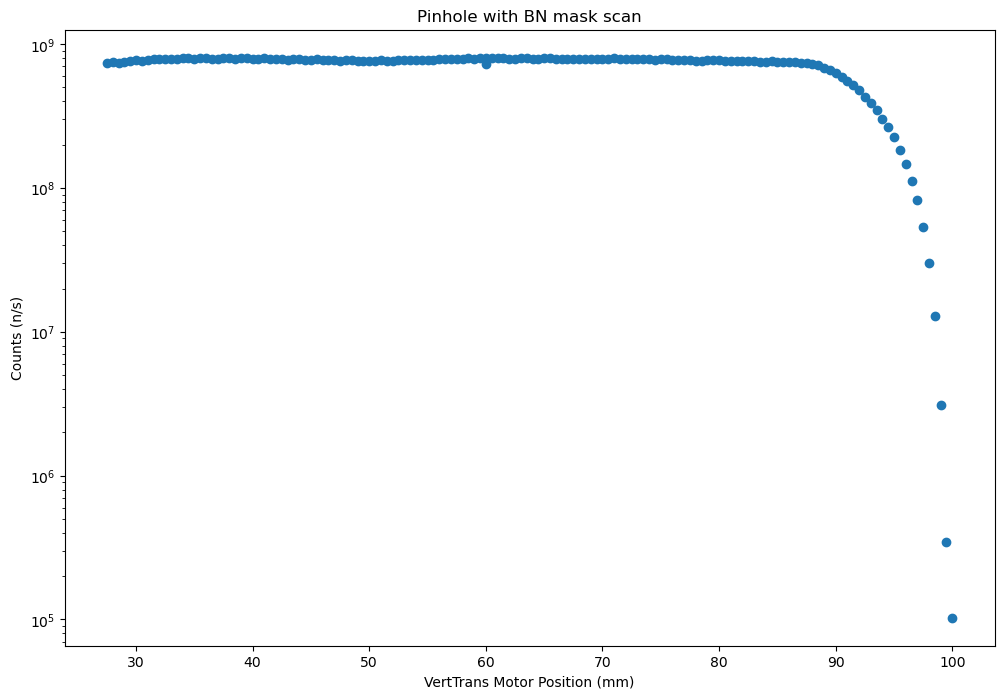

In [15]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotVertTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("VertTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole with BN mask scan")

Text(0.5, 1.0, 'BN mask HoriTrans scan (fixed pinhole)')

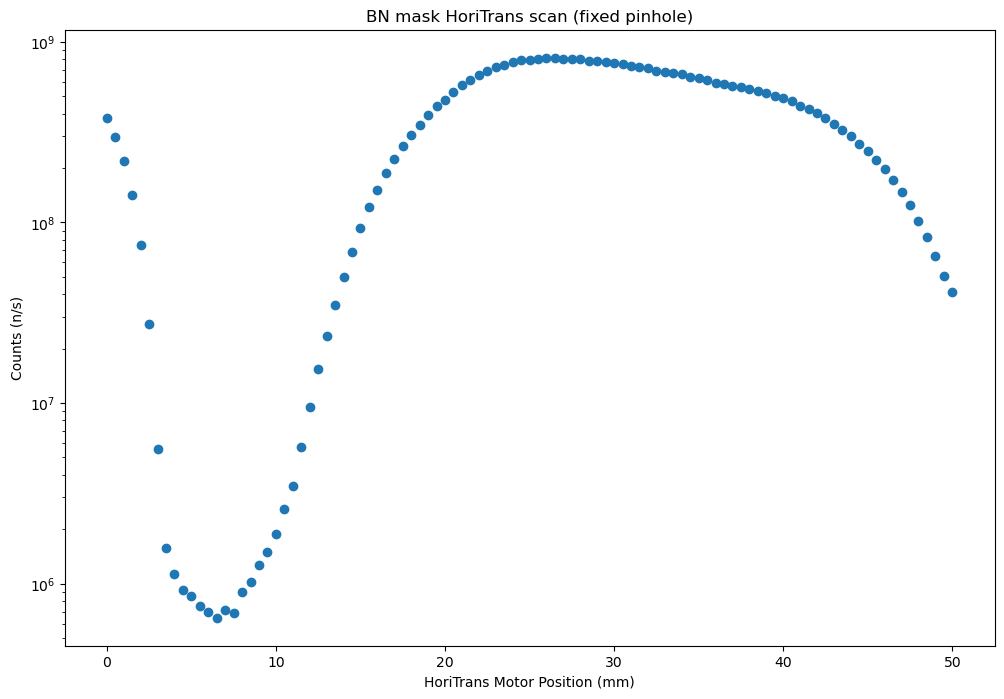

In [10]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotHoriTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("HoriTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("BN mask HoriTrans scan (fixed pinhole)")

In [90]:
pprint(meta_dict)

{'scan00_all_108.500_0060_4842.tiff': {'BMCounter': 12257.0,
                                       'BMCounterRate': 224.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 108.5},
 'scan00_all_109.000_0060_4841.tiff': {'BMCounter': 11890.0,
                                       'BMCounterRate': 218.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 109.0},
 'scan00_all_109.500_0060_4840.tiff': {'BMCounter': 11846.0,
                                       'BMCounterRate': 222.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 109.5},
 'scan00_all_110.000_0060_4839.tiff': {'BMCounter': 12400.0,
                                       'BMCounterRate': 197.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 110.0},
 'scan00_all

 'scan00_all_257.500_0060_4544.tiff': {'BMCounter': 1016458.0,
                                       'BMCounterRate': 16519.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 257.5},
 'scan00_all_258.000_0060_4543.tiff': {'BMCounter': 1035222.0,
                                       'BMCounterRate': 16560.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 258.0},
 'scan00_all_258.500_0060_4542.tiff': {'BMCounter': 1034672.0,
                                       'BMCounterRate': 16706.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 258.5},
 'scan00_all_259.000_0060_4541.tiff': {'BMCounter': 1053252.0,
                                       'BMCounterRate': 16775.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 259.

In [10]:
meta_df

,ExposureTime,MotHoriTrans,MotVertTrans,MotAperture,BMCounter,BMCounterRate,Rate,Neutrons
scan00_all_108.500_0060_4842.tiff,60.0,28.0,60.0,108.5,12257.0,224.0,204.283333,1.937866e+07
scan00_all_109.000_0060_4841.tiff,60.0,28.0,60.0,109.0,11890.0,218.0,198.166667,1.879842e+07
scan00_all_109.500_0060_4840.tiff,60.0,28.0,60.0,109.5,11846.0,222.0,197.433333,1.872885e+07
scan00_all_110.000_0060_4839.tiff,60.0,28.0,60.0,110.0,12400.0,197.0,206.666667,1.960474e+07
scan00_all_110.500_0060_4838.tiff,60.0,28.0,60.0,110.5,12131.0,191.0,202.183333,1.917945e+07
...,...,...,...,...,...,...,...,...
scan02_smalls_208.000_0120_4850.tiff,120.0,28.0,60.0,208.0,307328.0,2485.0,2561.066667,2.429470e+08
scan02_smalls_208.500_0120_4849.tiff,120.0,28.0,60.0,208.5,338766.0,2765.0,2823.050000,2.677992e+08
scan02_smalls_209.000_0120_4848.tiff,120.0,28.0,60.0,209.0,371347.0,3153.0,3094.558333,2.935549e+08
scan02_smalls_209.500_0120_4847.tiff,120.0,28.0,60.0,209.5,401520.0,3390.0,3346.000000,3.174071e+08


In [75]:
# for each in meta_dict.keys():
#     _dia = each.split('_')[1]
#     _dia = float(_dia.replace('mm', ''))
#     meta_dict[each]['Aperture_dia_mm'] = _dia

In [81]:
# meta_df['Area'] = 3.14159265 * (meta_df['Aperture_dia_mm']/2)**2

In [82]:
# meta_df['Neutrons_per_area'] = meta_df['Neutrons']/meta_df['Area']

Text(0, 0.5, 'Flux (n/s)')

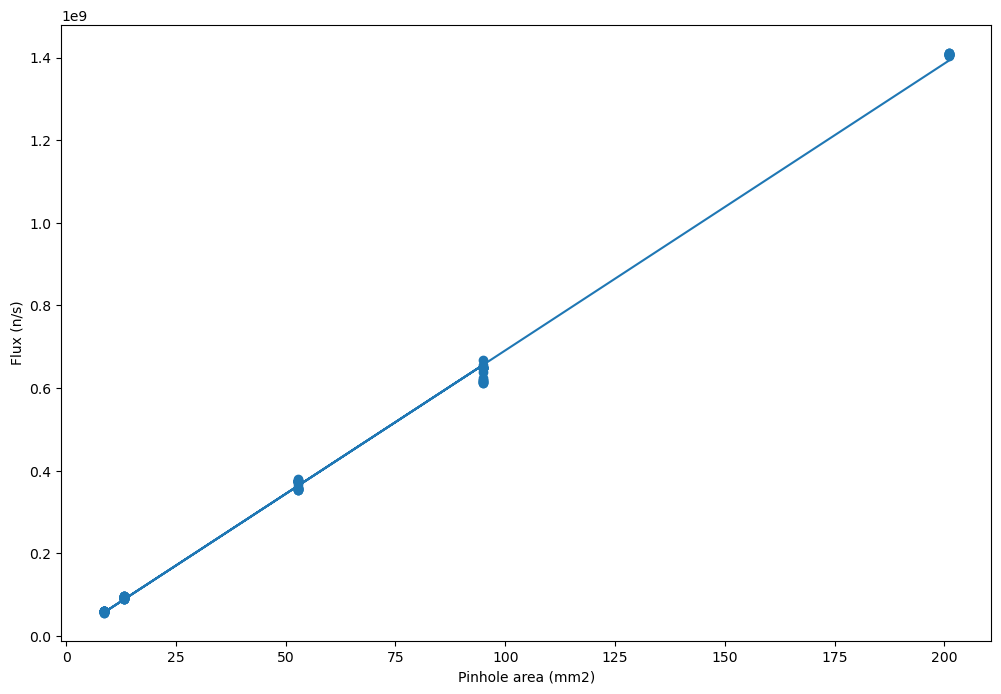

In [33]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['Area'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
#calculate equation for trendline
z = np.polyfit(meta_df['Area'], meta_df['Neutrons'], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(meta_df['Area'], p(meta_df['Area']))
plt.xlabel("Pinhole area (mm2)")
plt.ylabel("Flux (n/s)")

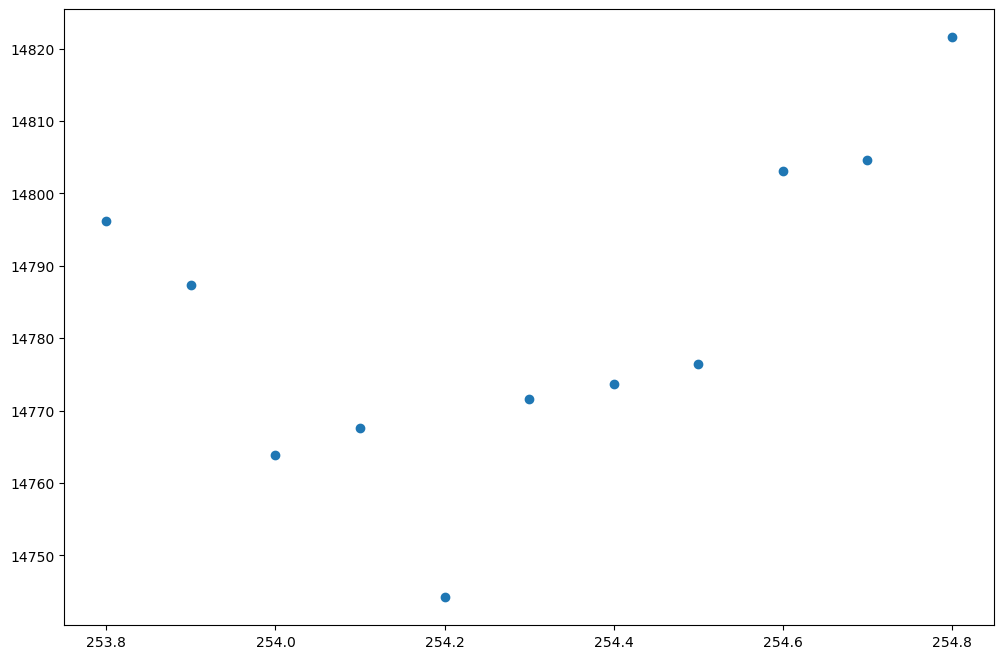

In [34]:
pinhole_size = [16, 11, 8.2, 4.1, 3.3]
pinhole_size = 16
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

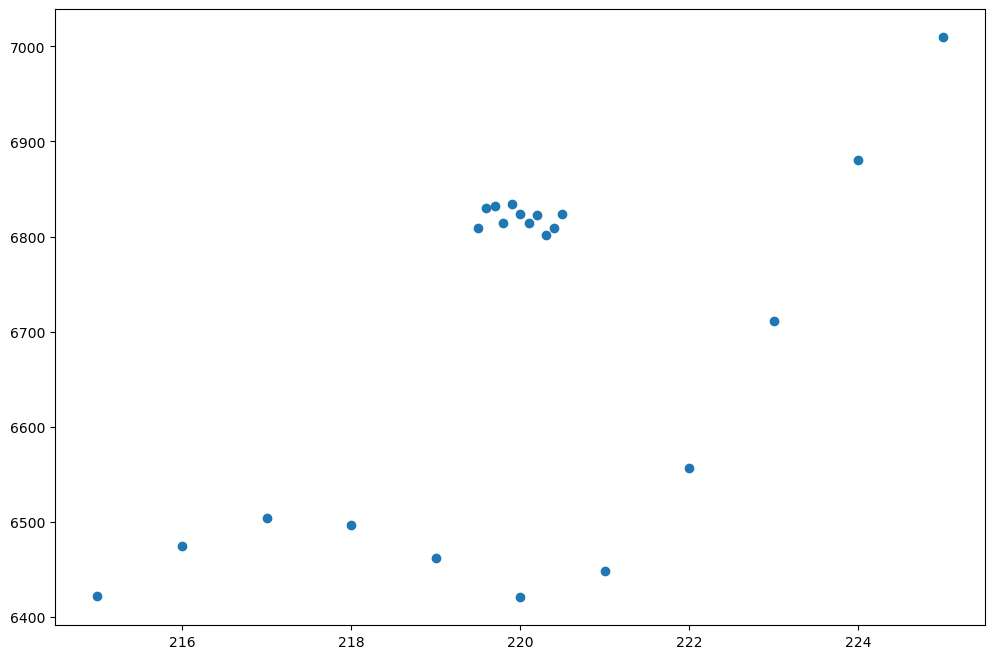

In [35]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 11
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

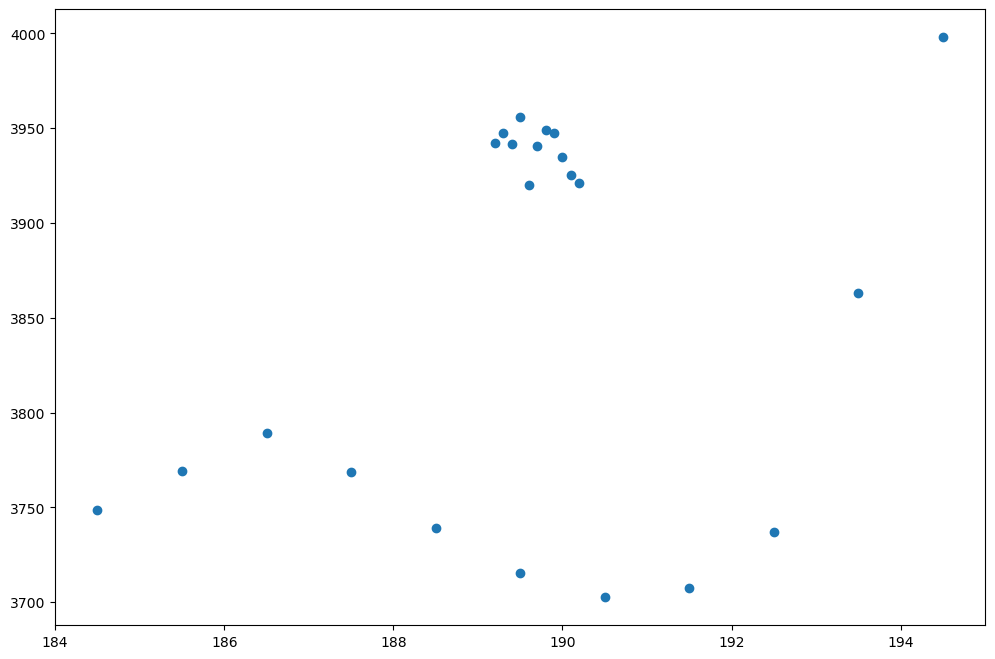

In [36]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 8.2
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

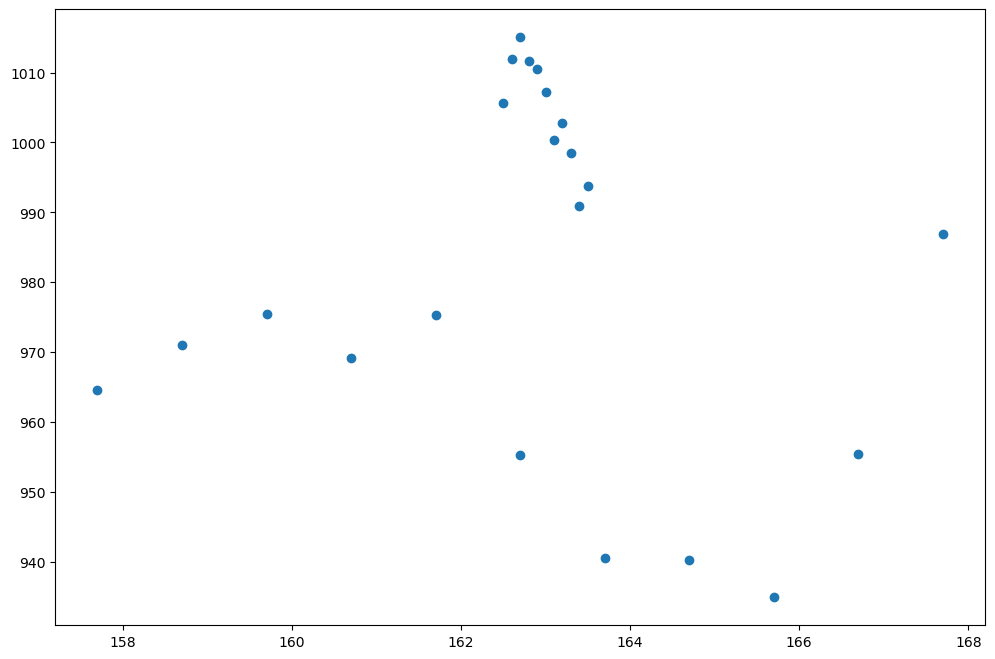

In [37]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 4.1
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

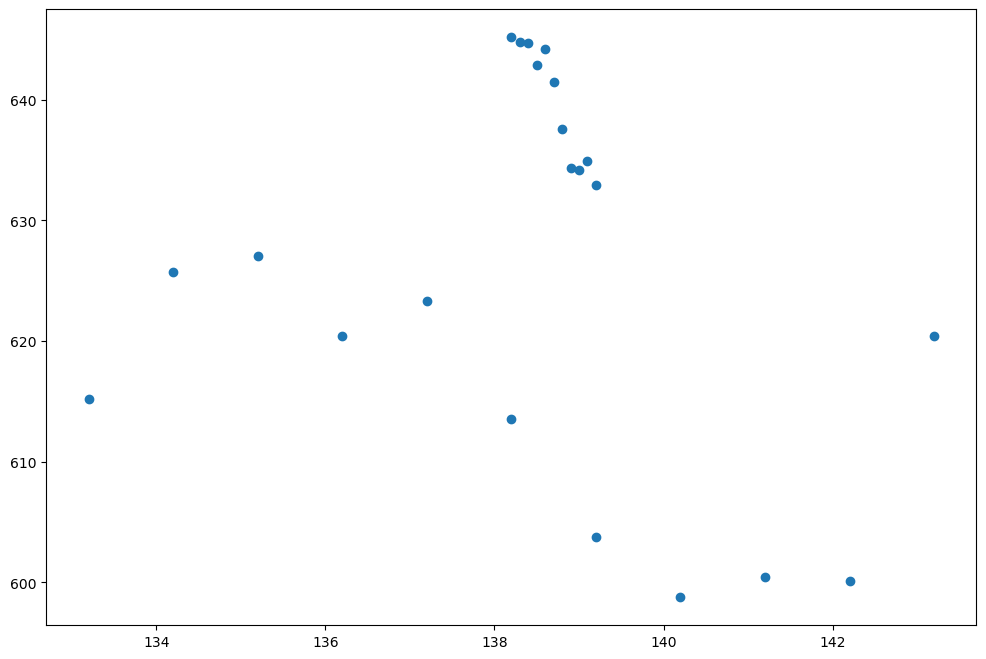

In [38]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 3.3
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

In [12]:
meta_df.to_csv('Pinhole_scan')

In [11]:
meta_df.to_clipboard()